In [42]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# For data manipulation
import pandas as pd
import numpy as np

# To plot
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/drug200.csv')
sex_replacement = {'F': 0, 'M': 1}
bp_replacement = {'NORMAL':1 , 'LOW':0 , 'HIGH':2}
cholesterol_replacement = {'NORMAL':1 , 'LOW':0 , 'HIGH':2}
drug_replacement = {'drugA': 0, 'drugB': 1, 'drugC': 2, 'drugX': 3, 'DrugY': 4}
df['Sex'] = df['Sex'].replace(sex_replacement)
df['BP'] = df['BP'].replace(bp_replacement)
df['Cholesterol'] = df['Cholesterol'].replace(cholesterol_replacement)
df['Drug'] = df['Drug'].replace(drug_replacement)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
split_percentage = 0.8
split = int(split_percentage*len(df))

X_train = X[:split]
y_train = y[:split]

X_test = X[split:]
y_test = y[split:]

cls = SVC().fit(X_train, y_train)

In [44]:
accuracy_train = accuracy_score(y_train, cls.predict(X_train))
accuracy_test = accuracy_score(y_test, cls.predict(X_test))

print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))


Train Accuracy: 70.62%
Test Accuracy: 72.50%


In [45]:
cls = SVC(C=0.001, kernel='linear').fit(X_train, y_train)
accuracy_train = accuracy_score(y_train, cls.predict(X_train))
accuracy_test = accuracy_score(y_test, cls.predict(X_test))

print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))


Train Accuracy: 71.88%
Test Accuracy: 75.00%


In [46]:
cls = SVC(C=0.001, kernel='poly').fit(X_train, y_train)
accuracy_train = accuracy_score(y_train, cls.predict(X_train))
accuracy_test = accuracy_score(y_test, cls.predict(X_test))

print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))


Train Accuracy: 44.38%
Test Accuracy: 50.00%


In [47]:
cls = SVC(C=0.001, kernel='rbf').fit(X_train, y_train)
accuracy_train = accuracy_score(y_train, cls.predict(X_train))
accuracy_test = accuracy_score(y_test, cls.predict(X_test))

print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))


Train Accuracy: 44.38%
Test Accuracy: 50.00%


In [48]:
cls = SVC(C=0.001, kernel='sigmoid').fit(X_train, y_train)
accuracy_train = accuracy_score(y_train, cls.predict(X_train))
accuracy_test = accuracy_score(y_test, cls.predict(X_test))

print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))


Train Accuracy: 44.38%
Test Accuracy: 50.00%


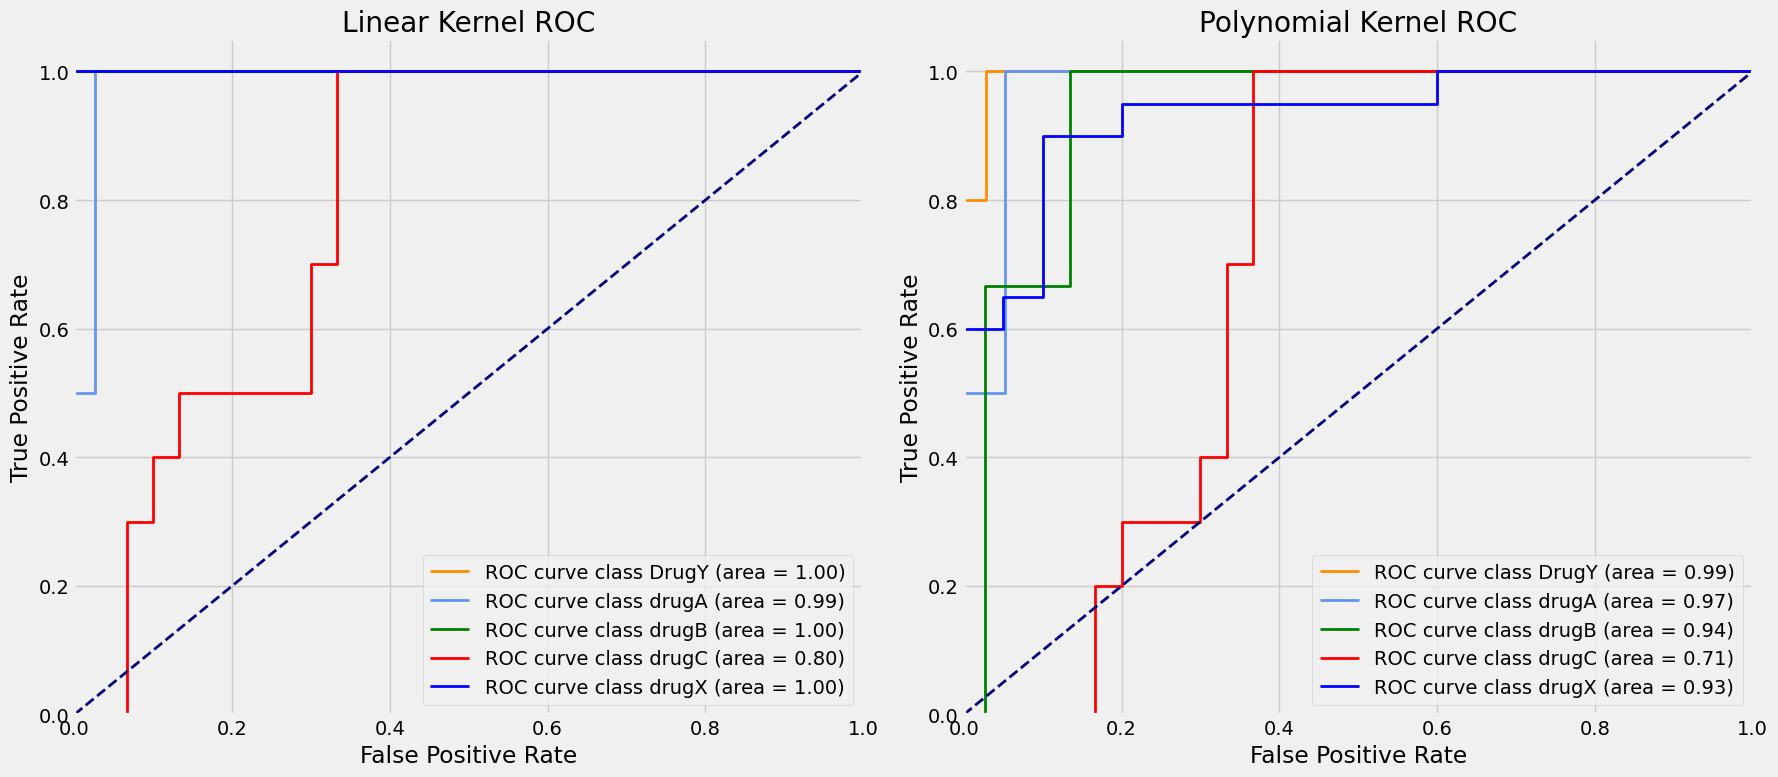

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

class_labels = ['DrugY', 'drugA', 'drugB', 'drugC', 'drugX']

# Computation for linear kernel
fpr_linear = dict()
tpr_linear = dict()
roc_auc_linear = dict()

linear_cls = OneVsRestClassifier(SVC(C=0.001, kernel='linear', probability=True)).fit(X_train, y_train)

y_score_linear = linear_cls.decision_function(X_test)

for i in range(len(class_labels)):
    binary_y_test = np.where(y_test == i, 1, 0)
    fpr_linear[i], tpr_linear[i], _ = roc_curve(binary_y_test, y_score_linear[:, i])
    roc_auc_linear[i] = auc(fpr_linear[i], tpr_linear[i])

# Computation for linear kernel
fpr_poly = dict()
tpr_poly = dict()
roc_auc_poly = dict()

poly_cls = OneVsRestClassifier(SVC(C=0.001, kernel='poly', probability=True)).fit(X_train, y_train)

y_score_poly = poly_cls.decision_function(X_test)

for i in range(len(class_labels)):
    binary_y_test = np.where(y_test == i, 1, 0)
    fpr_poly[i], tpr_poly[i], _ = roc_curve(binary_y_test, y_score_poly[:, i])
    roc_auc_poly[i] = auc(fpr_poly[i], tpr_poly[i])

plt.figure(figsize=(18, 8))

# Linear Kernel plotting
plt.subplot(1, 2, 1)

for i, color in zip(range(len(class_labels)), colors):
    plt.plot(fpr_linear[i], tpr_linear[i], color=color, lw=2, label='ROC curve class {} (area = {:.2f})'.format(class_labels[i], roc_auc_linear[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Linear Kernel ROC')
plt.legend(loc="lower right")

# Polynomial Kernel plotting
plt.subplot(1, 2, 2)

for i, color in zip(range(len(class_labels)), colors):
    plt.plot(fpr_poly[i], tpr_poly[i], color=color, lw=2, label='ROC curve class {} (area = {:.2f})'.format(class_labels[i], roc_auc_poly[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Polynomial Kernel ROC')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()


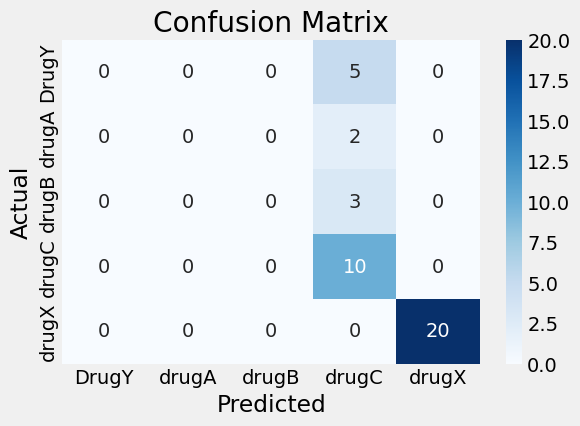

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

SVM = SVC(C=0.001, kernel='linear').fit(X_train, y_train)
y_pred = SVM.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [51]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1, 1]
}

svc = SVC()

grid_search = GridSearchCV(svc, param_grid, cv=5)
grid_search.fit(X, y)
print(f"Best Parameters: {grid_search.best_params_}")

best_model = grid_search.best_estimator_
accuracy_test = accuracy_score(y_test, best_model.predict(X_test))
print(f'Test Accuracy with Best Parameters: {accuracy_test*100:.2f}%')


Best Parameters: {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
Test Accuracy with Best Parameters: 100.00%
